In [1]:
import sys

sys.path.append("..")
import pandas as pd
from loggers.multi_cases_visualizer import MultiCasesVisualizer
from loggers.visualizer import Visualizer


# Data for line plots and box plots
work_dir = "plot_data/"
plot_dir = "plots/"
with_pun = "cliff_walking/Q_LEARNING-pTrue_zero_e-greedy.pkl"
without_pun = "cliff_walking/Q_LEARNING-pFalse_zero_e-greedy.pkl"
df1 = pd.read_pickle(work_dir + with_pun)
df2 = pd.read_pickle(work_dir + without_pun)
# Data for Parallel Coordinates Plot
smac_output = "cliff_walking/smac_results_pT.pkl"
result = pd.read_pickle(work_dir + smac_output)
print(df1)

                                      Learning Steps  \
0  [5, 2, 1, 30, 30, 1, 1, 10, 17, 7, 1, 30, 30, ...   
1  [4, 7, 7, 23, 30, 1, 25, 1, 18, 13, 30, 4, 13,...   
2  [3, 4, 8, 10, 30, 6, 30, 30, 7, 8, 4, 19, 15, ...   
3  [14, 1, 1, 7, 2, 3, 1, 1, 30, 7, 24, 30, 6, 30...   
4  [1, 1, 1, 30, 3, 30, 30, 1, 30, 4, 1, 12, 5, 4...   
5  [1, 7, 6, 1, 30, 30, 3, 4, 1, 26, 30, 1, 4, 25...   
6  [4, 2, 1, 4, 5, 26, 30, 15, 30, 30, 30, 30, 14...   
7  [1, 2, 30, 28, 6, 30, 10, 11, 30, 30, 30, 8, 1...   
8  [8, 1, 2, 27, 30, 21, 1, 30, 30, 30, 1, 20, 30...   
9  [1, 6, 5, 8, 2, 30, 30, 15, 26, 7, 24, 18, 25,...   

                          Learning Cumulated Rewards  \
0  [-104, -101, -100, -30, -30, -100, -100, -109,...   
1  [-103, -106, -106, -122, -30, -100, -124, -100...   
2  [-102, -103, -107, -109, -30, -105, -30, -30, ...   
3  [-113, -100, -100, -106, -101, -102, -100, -10...   
4  [-100, -100, -100, -30, -102, -30, -30, -100, ...   
5  [-100, -106, -105, -100, -30, -30, -102, -10

In [2]:
data = [df1, df2]
cases = ["with punishment", "without punishment"]
env = "CliffWalking-v0"

mv = MultiCasesVisualizer(data, cases, env)
# Create figure
mv.single_line_plot(
    metric_x="Training Episodes",
    metric_y="Test Steps",
    figsize=(16, 8),
    show_mean=True,
    fill_between=True,
    line_width=3,
    colors=["r", "b"],
    y_lim=[0, 35],
    hline=13,
    test_every=10,
    x_fontsize=30,
    y_fontsize=30,
    legend_fontsize=20,
    legend_loc="lower right",
    save_plot=True,
    foldername="plots/",
    filename="line_plot_cliff",
    file_format="png",
)

KeyError: "['Unnamed: 0'] not found in axis"

In [3]:
mv.create_box_plot(
    "Test Steps",
    #figsize=(5, 5),
    save_plot=True,
    #foldername="plots/",
    filename="box_plot",
    file_format="png",
)

NameError: name 'mv' is not defined

In [4]:
dimensions = ["discount_factor", "epsilon", "learning_rate", "normalized_score"]
v = Visualizer(result)
v.create_parallel_coordinate_plot(
    dimensions=dimensions,
    save_plot=True,
    foldername="plots/",
    filename="parallel_coordinate_plot",
    file_format="png",
)

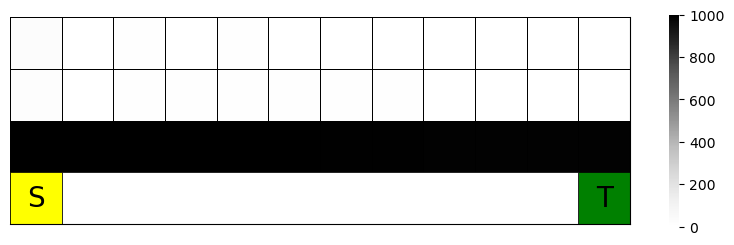

In [5]:
v_pT = Visualizer(df1)
vmax = 1000
vmin = 0
cbar_kws = {"shrink": 0.55}
v_pT.create_heat_map(
    metric="Test State Visit Matrix",
    figsize=(10, 5),
    vmax=vmax,
    vmin=vmin,
    annot=False,
    cmap="Grays",
    cbar_kws=cbar_kws,
    save_plot=True,
    foldername="plots/",
    filename="heat_map_sav",
    file_format="png",
)

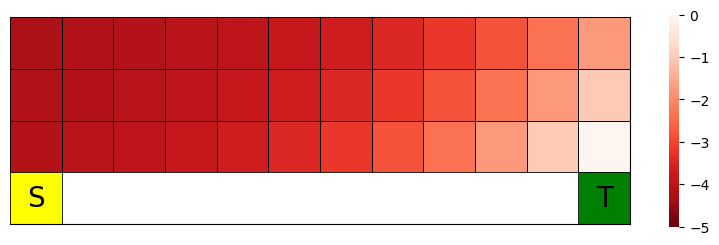

In [6]:
vmax = 0
vmin = -5
cbar_kws = {"shrink": 0.55}
v_pT.create_heat_map(
    metric="Final Q Tables",
    figsize=(10, 5),
    vmax=vmax,
    vmin=vmin,
    annot=False,
    cmap="Reds_r",
    cbar_kws=cbar_kws,
    save_plot=True,
    foldername="plots/",
    filename="heat_map_fqt",
    file_format="png",
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from loggers.multi_cases_visualizer import MultiCasesVisualizer
from utils.data_process import get_threshold_plot_data_frames

work_dir = "plot_data/robot_arm/"
df_99 = pd.read_pickle(f"{work_dir}NAO4-ask99.pkl")
df_09 = pd.read_pickle(f"{work_dir}NAO4-ask09.pkl")
df_08 = pd.read_pickle(f"{work_dir}NAO4-ask08.pkl")
df_07 = pd.read_pickle(f"{work_dir}NAO4-ask07.pkl")
df_06 = pd.read_pickle(f"{work_dir}NAO4-ask06.pkl")
df_05 = pd.read_pickle(f"{work_dir}NAO4-ask05.pkl")
df_04 = pd.read_pickle(f"{work_dir}NAO4-ask04.pkl")
df_03 = pd.read_pickle(f"{work_dir}NAO4-ask03.pkl")
df_02 = pd.read_pickle(f"{work_dir}NAO4-ask02.pkl")
df_01 = pd.read_pickle(f"{work_dir}NAO4-ask01.pkl")
df_00 = pd.read_pickle(f"{work_dir}NAO4-ask00.pkl")
data = [df_00, df_01, df_02, df_03, df_04, df_05, df_06, df_07, df_08, df_09, df_99]
cases = ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "0.99"]

In [9]:
th = [70, 50, 30, 20, 15]
th_plot_data, th_cases = get_threshold_plot_data_frames(th, data, cases, add_best=True)

In [10]:
nao4_fr_v = MultiCasesVisualizer(data, cases)
cmap_line = plt.get_cmap("magma")
line_colors = [cmap_line(i / len(data)) for i in range(len(data))]
x, y = nao4_fr_v.get_threshold_points(
    "Cumulated Training Steps",
    "Failure Rate",
    th,
    show_mean=True,
    show_percentage=True,
)
steps_mk = np.min(x, axis=0)
cmap_marker = plt.get_cmap("Blues")
marker_colors_nao = [
    cmap_marker((i + 1) / len(steps_mk)) for i in range(len(steps_mk))
] * 2
steps_marker_points_nao = [(point, 0) for point in steps_mk] * 2
marker_style_nao = [11] * len(steps_mk) + [2] * len(steps_mk)

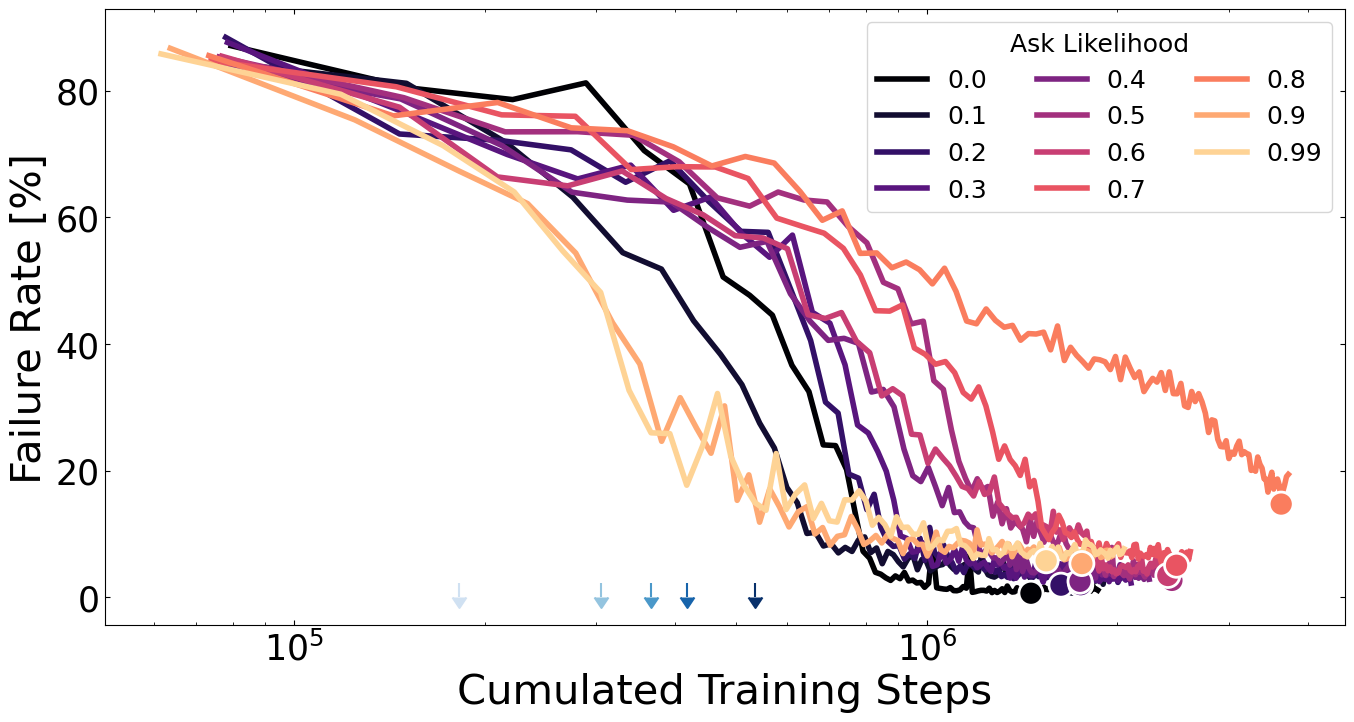

In [15]:
nao4_fr_v.single_line_plot(
    metric_x="Cumulated Training Steps",
    metric_y="Failure Rate",
    figsize=(16, 8),
    colors=line_colors,
    show_min=True,
    show_mean=True,
    show_percentage=True,
    line_width=4,
    test_every=1,
    legend_title="Ask Likelihood",
    legend_fontsize=18,
    legend_ncols=3,
    legend_loc="upper right",
    x_label="Cumulated Training Steps",
    y_label="Failure Rate [%]",
    x_fontsize=30,
    y_fontsize=30,
    xscale="log",
    yscale="linear",
    mark_points=steps_marker_points_nao,
    marker=marker_style_nao,
    marker_colors=marker_colors_nao,
    save_plot=True,
    foldername="plots/",
    filename="line_plot_nao4_fr",
    file_format="png",
)

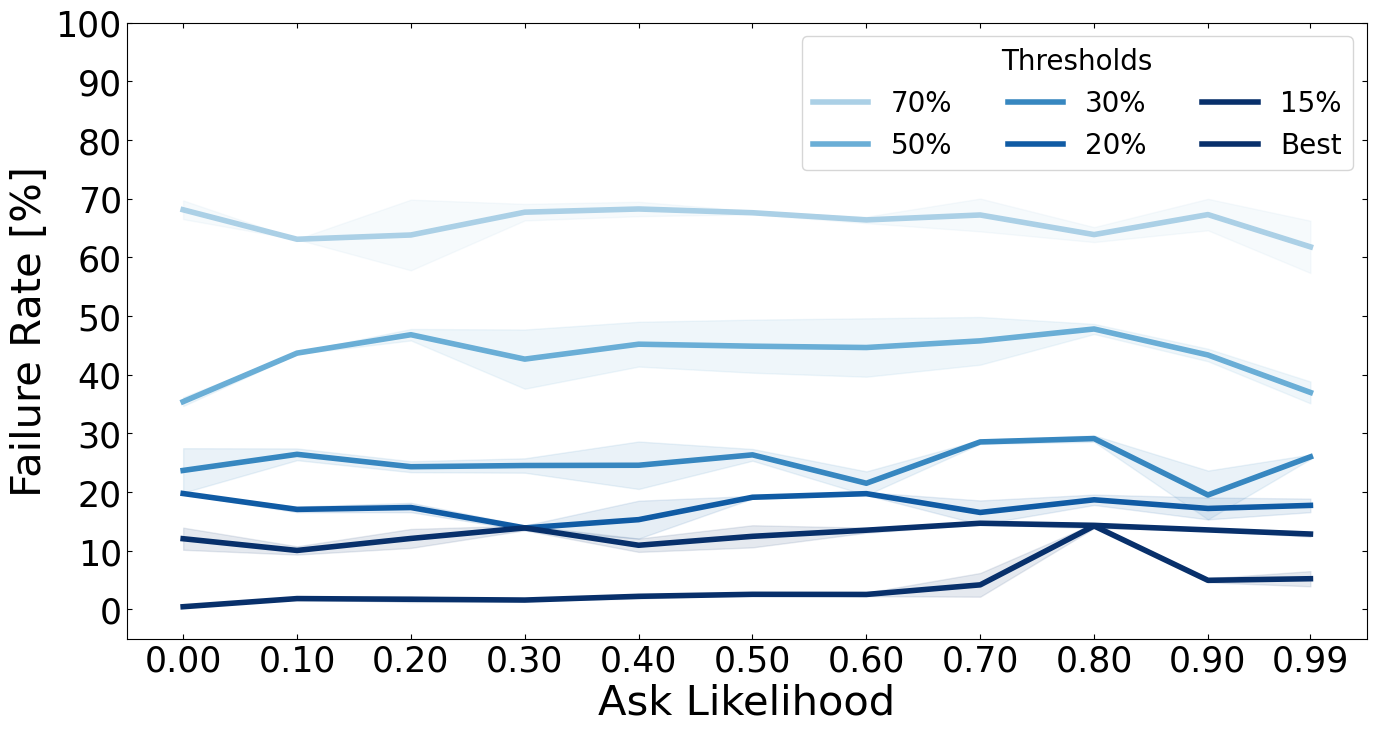

In [17]:
nao_th_v = MultiCasesVisualizer(th_plot_data, th_cases)
cmap = plt.get_cmap("Blues")
colors = [cmap((i + 2) / len(th_cases)) for i in range(len(th_cases))]
nao_th_v.single_line_plot(
    metric_x="Ask Likelihood",
    metric_y="Failure Rate",
    colors=colors,
    show_mean=True,
    figsize=(16, 8),
    x_fontsize=30,
    y_fontsize=30,
    line_width=4,
    fill_between=True,
    legend_title="Thresholds",
    legend_fontsize=20,
    legend_ncols=3,
    y_lim=[-5, 100],
    x_ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99],
    y_ticks=[i for i in range(0, 101, 10)],
    x_label="Ask Likelihood",
    y_label="Failure Rate [%]",
    save_plot=True,
    foldername="plots/",
    filename="line_plot_nao4_th",
    file_format="png",
)